## Tokenization : Beer Items

### 1. Import Files

In [1]:
import pandas as pd

#import items files
df_aux1 = pd.concat(map(pd.read_excel, ['beer ambient master w forecast 20220425.xlsx', 'beer chilled master w forecast 20220425.xlsx']))
df_aux1=df_aux1.groupby(['id','name','brand','subcategory','type']).size().reset_index().rename(columns={0:'F1'})
df_ms=df_aux1
#import transaltion file
df_tr=pd.read_excel("translation_beer.xlsx")
#merge translation file with original items description data
df_ms=pd.merge(df_ms,df_tr,left_on=["name"],right_on=["polish"])
df_ms.drop(['name','polish'], axis=1, inplace=True)
df_ms.rename(columns={"english":"name_english"},inplace=True)
df_ms

,id,brand,subcategory,type,F1,name_english
0,10000068,EB,Multipack,Light beer,192,EB BEER 0.5L CAN
1,10000072,LECH,Bottle,Light beer,34,LECH PILS BEER 0.5L BOTTLEZWR
2,10000073,LECH,Bottle,Light beer,192,LECH PREMIUM BEER 0.5 L BOTTLE ZWR
3,10000080,LEZAJSK,Bottle,Light beer,8,LEZAJSK BEER PELNE 0.5 L BOTTLE ZWR
4,10000081,LEZAJSK,Multipack,Light beer,8,LEZAJSK FULL BEER 0.5 L CAN
...,...,...,...,...,...,...
294,80411051,HEINEKEN,Multipack,Light beer,192,4-PACK OF HEINEKEN BEER 0.5 L CAN
295,80411131,DESPERADOS,Multipack,Flavoured beer,96,DESPERADOS 4-PACK 0.5 L CAN
296,80411262,EB,Multipack,Light beer,192,4-PACK EB BEER 0.5 L CAN
297,80411341,HARNAS,Multipack,Flavoured beer,96,4-PACK OF HARNAS LODOHERBATA. 0.5L CAN


In [2]:
#concat brand, type and description texts in a single column
df_ms['text']=df_ms['brand'].astype(str)+ " "+df_ms['type'].astype(str)+ " " + df_ms['name_english']
df_ms

,id,brand,subcategory,type,F1,name_english,text
0,10000068,EB,Multipack,Light beer,192,EB BEER 0.5L CAN,EB Light beer EB BEER 0.5L CAN
1,10000072,LECH,Bottle,Light beer,34,LECH PILS BEER 0.5L BOTTLEZWR,LECH Light beer LECH PILS BEER 0.5L BOTTLEZWR
2,10000073,LECH,Bottle,Light beer,192,LECH PREMIUM BEER 0.5 L BOTTLE ZWR,LECH Light beer LECH PREMIUM BEER 0.5 L BOTTLE...
3,10000080,LEZAJSK,Bottle,Light beer,8,LEZAJSK BEER PELNE 0.5 L BOTTLE ZWR,LEZAJSK Light beer LEZAJSK BEER PELNE 0.5 L BO...
4,10000081,LEZAJSK,Multipack,Light beer,8,LEZAJSK FULL BEER 0.5 L CAN,LEZAJSK Light beer LEZAJSK FULL BEER 0.5 L CAN
...,...,...,...,...,...,...,...
294,80411051,HEINEKEN,Multipack,Light beer,192,4-PACK OF HEINEKEN BEER 0.5 L CAN,HEINEKEN Light beer 4-PACK OF HEINEKEN BEER 0....
295,80411131,DESPERADOS,Multipack,Flavoured beer,96,DESPERADOS 4-PACK 0.5 L CAN,DESPERADOS Flavoured beer DESPERADOS 4-PACK 0....
296,80411262,EB,Multipack,Light beer,192,4-PACK EB BEER 0.5 L CAN,EB Light beer 4-PACK EB BEER 0.5 L CAN
297,80411341,HARNAS,Multipack,Flavoured beer,96,4-PACK OF HARNAS LODOHERBATA. 0.5L CAN,HARNAS Flavoured beer 4-PACK OF HARNAS LODOHER...


### 2. Tokenization

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

#tokenization items description
tokenizer = RegexpTokenizer(r'\w+')
df_ms['tokenized_text']= df_ms['text'].apply(str).str.lower().apply(tokenizer.tokenize) 
df_ms

,id,brand,subcategory,type,F1,name_english,text,tokenized_text
0,10000068,EB,Multipack,Light beer,192,EB BEER 0.5L CAN,EB Light beer EB BEER 0.5L CAN,"[eb, light, beer, eb, beer, 0, 5l, can]"
1,10000072,LECH,Bottle,Light beer,34,LECH PILS BEER 0.5L BOTTLEZWR,LECH Light beer LECH PILS BEER 0.5L BOTTLEZWR,"[lech, light, beer, lech, pils, beer, 0, 5l, b..."
2,10000073,LECH,Bottle,Light beer,192,LECH PREMIUM BEER 0.5 L BOTTLE ZWR,LECH Light beer LECH PREMIUM BEER 0.5 L BOTTLE...,"[lech, light, beer, lech, premium, beer, 0, 5,..."
3,10000080,LEZAJSK,Bottle,Light beer,8,LEZAJSK BEER PELNE 0.5 L BOTTLE ZWR,LEZAJSK Light beer LEZAJSK BEER PELNE 0.5 L BO...,"[lezajsk, light, beer, lezajsk, beer, pelne, 0..."
4,10000081,LEZAJSK,Multipack,Light beer,8,LEZAJSK FULL BEER 0.5 L CAN,LEZAJSK Light beer LEZAJSK FULL BEER 0.5 L CAN,"[lezajsk, light, beer, lezajsk, full, beer, 0,..."
...,...,...,...,...,...,...,...,...
294,80411051,HEINEKEN,Multipack,Light beer,192,4-PACK OF HEINEKEN BEER 0.5 L CAN,HEINEKEN Light beer 4-PACK OF HEINEKEN BEER 0....,"[heineken, light, beer, 4, pack, of, heineken,..."
295,80411131,DESPERADOS,Multipack,Flavoured beer,96,DESPERADOS 4-PACK 0.5 L CAN,DESPERADOS Flavoured beer DESPERADOS 4-PACK 0....,"[desperados, flavoured, beer, desperados, 4, p..."
296,80411262,EB,Multipack,Light beer,192,4-PACK EB BEER 0.5 L CAN,EB Light beer 4-PACK EB BEER 0.5 L CAN,"[eb, light, beer, 4, pack, eb, beer, 0, 5, l, ..."
297,80411341,HARNAS,Multipack,Flavoured beer,96,4-PACK OF HARNAS LODOHERBATA. 0.5L CAN,HARNAS Flavoured beer 4-PACK OF HARNAS LODOHER...,"[harnas, flavoured, beer, 4, pack, of, harnas,..."


### 3. Remove Stop Words: the, of, any, all , and, ...

In [5]:
#removing stop words
stopwords = stopwords.words('english')
# Remove a single word from stop words
stopwords.remove('can')
#function to remove stop words
def wo_stopwords(words):
    words_new=[]
    for w in words:
        if ((w not in stopwords) and (len(w)>1)):
            words_new.append(w)
    return words_new

df_ms['tokens_wo_sw']= df_ms['tokenized_text'].apply(wo_stopwords) 
df_ms

,id,brand,subcategory,type,F1,name_english,text,tokenized_text,tokens_wo_sw
0,10000068,EB,Multipack,Light beer,192,EB BEER 0.5L CAN,EB Light beer EB BEER 0.5L CAN,"[eb, light, beer, eb, beer, 0, 5l, can]","[eb, light, beer, eb, beer, 5l, can]"
1,10000072,LECH,Bottle,Light beer,34,LECH PILS BEER 0.5L BOTTLEZWR,LECH Light beer LECH PILS BEER 0.5L BOTTLEZWR,"[lech, light, beer, lech, pils, beer, 0, 5l, b...","[lech, light, beer, lech, pils, beer, 5l, bott..."
2,10000073,LECH,Bottle,Light beer,192,LECH PREMIUM BEER 0.5 L BOTTLE ZWR,LECH Light beer LECH PREMIUM BEER 0.5 L BOTTLE...,"[lech, light, beer, lech, premium, beer, 0, 5,...","[lech, light, beer, lech, premium, beer, bottl..."
3,10000080,LEZAJSK,Bottle,Light beer,8,LEZAJSK BEER PELNE 0.5 L BOTTLE ZWR,LEZAJSK Light beer LEZAJSK BEER PELNE 0.5 L BO...,"[lezajsk, light, beer, lezajsk, beer, pelne, 0...","[lezajsk, light, beer, lezajsk, beer, pelne, b..."
4,10000081,LEZAJSK,Multipack,Light beer,8,LEZAJSK FULL BEER 0.5 L CAN,LEZAJSK Light beer LEZAJSK FULL BEER 0.5 L CAN,"[lezajsk, light, beer, lezajsk, full, beer, 0,...","[lezajsk, light, beer, lezajsk, full, beer, can]"
...,...,...,...,...,...,...,...,...,...
294,80411051,HEINEKEN,Multipack,Light beer,192,4-PACK OF HEINEKEN BEER 0.5 L CAN,HEINEKEN Light beer 4-PACK OF HEINEKEN BEER 0....,"[heineken, light, beer, 4, pack, of, heineken,...","[heineken, light, beer, pack, heineken, beer, ..."
295,80411131,DESPERADOS,Multipack,Flavoured beer,96,DESPERADOS 4-PACK 0.5 L CAN,DESPERADOS Flavoured beer DESPERADOS 4-PACK 0....,"[desperados, flavoured, beer, desperados, 4, p...","[desperados, flavoured, beer, desperados, pack..."
296,80411262,EB,Multipack,Light beer,192,4-PACK EB BEER 0.5 L CAN,EB Light beer 4-PACK EB BEER 0.5 L CAN,"[eb, light, beer, 4, pack, eb, beer, 0, 5, l, ...","[eb, light, beer, pack, eb, beer, can]"
297,80411341,HARNAS,Multipack,Flavoured beer,96,4-PACK OF HARNAS LODOHERBATA. 0.5L CAN,HARNAS Flavoured beer 4-PACK OF HARNAS LODOHER...,"[harnas, flavoured, beer, 4, pack, of, harnas,...","[harnas, flavoured, beer, pack, harnas, lodohe..."


### 4. Lemmatization. Find lemma of the words

In [6]:
from nltk import pos_tag
from nltk.corpus import wordnet

#function to get tag of each word: noun, adjective, verb,...
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer_wtag= lambda word: WordNetLemmatizer().lemmatize(word,get_wordnet_pos(word))
lemmatizer_list= lambda words: list(map(lemmatizer_wtag,words))
df_ms['lemmatized_text']= df_ms['tokens_wo_sw'].apply(lemmatizer_list)
df_ms

,id,brand,subcategory,type,F1,name_english,text,tokenized_text,tokens_wo_sw,lemmatized_text
0,10000068,EB,Multipack,Light beer,192,EB BEER 0.5L CAN,EB Light beer EB BEER 0.5L CAN,"[eb, light, beer, eb, beer, 0, 5l, can]","[eb, light, beer, eb, beer, 5l, can]","[eb, light, beer, eb, beer, 5l, can]"
1,10000072,LECH,Bottle,Light beer,34,LECH PILS BEER 0.5L BOTTLEZWR,LECH Light beer LECH PILS BEER 0.5L BOTTLEZWR,"[lech, light, beer, lech, pils, beer, 0, 5l, b...","[lech, light, beer, lech, pils, beer, 5l, bott...","[lech, light, beer, lech, pils, beer, 5l, bott..."
2,10000073,LECH,Bottle,Light beer,192,LECH PREMIUM BEER 0.5 L BOTTLE ZWR,LECH Light beer LECH PREMIUM BEER 0.5 L BOTTLE...,"[lech, light, beer, lech, premium, beer, 0, 5,...","[lech, light, beer, lech, premium, beer, bottl...","[lech, light, beer, lech, premium, beer, bottl..."
3,10000080,LEZAJSK,Bottle,Light beer,8,LEZAJSK BEER PELNE 0.5 L BOTTLE ZWR,LEZAJSK Light beer LEZAJSK BEER PELNE 0.5 L BO...,"[lezajsk, light, beer, lezajsk, beer, pelne, 0...","[lezajsk, light, beer, lezajsk, beer, pelne, b...","[lezajsk, light, beer, lezajsk, beer, pelne, b..."
4,10000081,LEZAJSK,Multipack,Light beer,8,LEZAJSK FULL BEER 0.5 L CAN,LEZAJSK Light beer LEZAJSK FULL BEER 0.5 L CAN,"[lezajsk, light, beer, lezajsk, full, beer, 0,...","[lezajsk, light, beer, lezajsk, full, beer, can]","[lezajsk, light, beer, lezajsk, full, beer, can]"
...,...,...,...,...,...,...,...,...,...,...
294,80411051,HEINEKEN,Multipack,Light beer,192,4-PACK OF HEINEKEN BEER 0.5 L CAN,HEINEKEN Light beer 4-PACK OF HEINEKEN BEER 0....,"[heineken, light, beer, 4, pack, of, heineken,...","[heineken, light, beer, pack, heineken, beer, ...","[heineken, light, beer, pack, heineken, beer, ..."
295,80411131,DESPERADOS,Multipack,Flavoured beer,96,DESPERADOS 4-PACK 0.5 L CAN,DESPERADOS Flavoured beer DESPERADOS 4-PACK 0....,"[desperados, flavoured, beer, desperados, 4, p...","[desperados, flavoured, beer, desperados, pack...","[desperado, flavour, beer, desperado, pack, can]"
296,80411262,EB,Multipack,Light beer,192,4-PACK EB BEER 0.5 L CAN,EB Light beer 4-PACK EB BEER 0.5 L CAN,"[eb, light, beer, 4, pack, eb, beer, 0, 5, l, ...","[eb, light, beer, pack, eb, beer, can]","[eb, light, beer, pack, eb, beer, can]"
297,80411341,HARNAS,Multipack,Flavoured beer,96,4-PACK OF HARNAS LODOHERBATA. 0.5L CAN,HARNAS Flavoured beer 4-PACK OF HARNAS LODOHER...,"[harnas, flavoured, beer, 4, pack, of, harnas,...","[harnas, flavoured, beer, pack, harnas, lodohe...","[harnas, flavour, beer, pack, harnas, lodoherb..."


### 5. Remove repeated words

In [7]:
#to remove repeated words
unique_list= lambda words: list(dict.fromkeys(words))
df_ms['text_uniques']= df_ms['lemmatized_text'].apply(unique_list)
df_ms

,id,brand,subcategory,type,F1,name_english,text,tokenized_text,tokens_wo_sw,lemmatized_text,text_uniques
0,10000068,EB,Multipack,Light beer,192,EB BEER 0.5L CAN,EB Light beer EB BEER 0.5L CAN,"[eb, light, beer, eb, beer, 0, 5l, can]","[eb, light, beer, eb, beer, 5l, can]","[eb, light, beer, eb, beer, 5l, can]","[eb, light, beer, 5l, can]"
1,10000072,LECH,Bottle,Light beer,34,LECH PILS BEER 0.5L BOTTLEZWR,LECH Light beer LECH PILS BEER 0.5L BOTTLEZWR,"[lech, light, beer, lech, pils, beer, 0, 5l, b...","[lech, light, beer, lech, pils, beer, 5l, bott...","[lech, light, beer, lech, pils, beer, 5l, bott...","[lech, light, beer, pils, 5l, bottlezwr]"
2,10000073,LECH,Bottle,Light beer,192,LECH PREMIUM BEER 0.5 L BOTTLE ZWR,LECH Light beer LECH PREMIUM BEER 0.5 L BOTTLE...,"[lech, light, beer, lech, premium, beer, 0, 5,...","[lech, light, beer, lech, premium, beer, bottl...","[lech, light, beer, lech, premium, beer, bottl...","[lech, light, beer, premium, bottle, zwr]"
3,10000080,LEZAJSK,Bottle,Light beer,8,LEZAJSK BEER PELNE 0.5 L BOTTLE ZWR,LEZAJSK Light beer LEZAJSK BEER PELNE 0.5 L BO...,"[lezajsk, light, beer, lezajsk, beer, pelne, 0...","[lezajsk, light, beer, lezajsk, beer, pelne, b...","[lezajsk, light, beer, lezajsk, beer, pelne, b...","[lezajsk, light, beer, pelne, bottle, zwr]"
4,10000081,LEZAJSK,Multipack,Light beer,8,LEZAJSK FULL BEER 0.5 L CAN,LEZAJSK Light beer LEZAJSK FULL BEER 0.5 L CAN,"[lezajsk, light, beer, lezajsk, full, beer, 0,...","[lezajsk, light, beer, lezajsk, full, beer, can]","[lezajsk, light, beer, lezajsk, full, beer, can]","[lezajsk, light, beer, full, can]"
...,...,...,...,...,...,...,...,...,...,...,...
294,80411051,HEINEKEN,Multipack,Light beer,192,4-PACK OF HEINEKEN BEER 0.5 L CAN,HEINEKEN Light beer 4-PACK OF HEINEKEN BEER 0....,"[heineken, light, beer, 4, pack, of, heineken,...","[heineken, light, beer, pack, heineken, beer, ...","[heineken, light, beer, pack, heineken, beer, ...","[heineken, light, beer, pack, can]"
295,80411131,DESPERADOS,Multipack,Flavoured beer,96,DESPERADOS 4-PACK 0.5 L CAN,DESPERADOS Flavoured beer DESPERADOS 4-PACK 0....,"[desperados, flavoured, beer, desperados, 4, p...","[desperados, flavoured, beer, desperados, pack...","[desperado, flavour, beer, desperado, pack, can]","[desperado, flavour, beer, pack, can]"
296,80411262,EB,Multipack,Light beer,192,4-PACK EB BEER 0.5 L CAN,EB Light beer 4-PACK EB BEER 0.5 L CAN,"[eb, light, beer, 4, pack, eb, beer, 0, 5, l, ...","[eb, light, beer, pack, eb, beer, can]","[eb, light, beer, pack, eb, beer, can]","[eb, light, beer, pack, can]"
297,80411341,HARNAS,Multipack,Flavoured beer,96,4-PACK OF HARNAS LODOHERBATA. 0.5L CAN,HARNAS Flavoured beer 4-PACK OF HARNAS LODOHER...,"[harnas, flavoured, beer, 4, pack, of, harnas,...","[harnas, flavoured, beer, pack, harnas, lodohe...","[harnas, flavour, beer, pack, harnas, lodoherb...","[harnas, flavour, beer, pack, lodoherbata, 5l,..."


### 6. Calculate correlation matrix

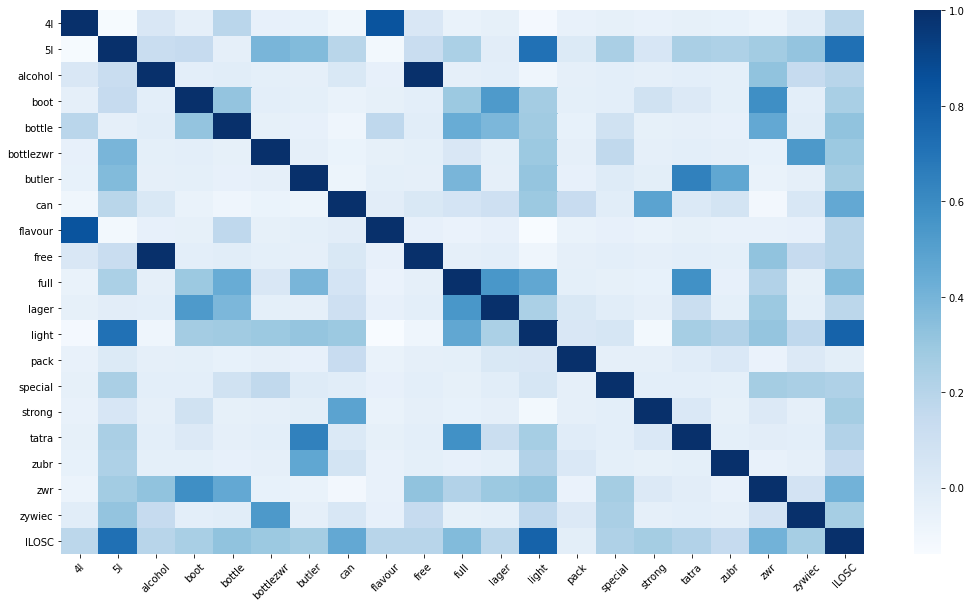

In [8]:
# correlation with sales
df_baskets=pd.read_csv("zabka_test_baskets.csv")

# function remove "beer" word tokens list
#words_new = [i for i in words if i not in stopwords]
def wo_useless(words):
    words_new=[]
    for w in words:
        if (w != 'beer'):
            words_new.append(w)
    return words_new

df_ms['text_uniques']= df_ms['text_uniques'].apply(wo_useless) 

#tokens vs sales transaction
df_bk_tokens=pd.merge(df_ms,df_baskets, left_on=["id"], right_on=["MATERIAL"],how='inner')
df_bk_tokens=df_bk_tokens.explode('text_uniques',ignore_index=True)
#df_bk_tokens.drop("Unnamed: 0",axis=1, inplace=True)

#filter 20 most important tokens
top20=list(df_bk_tokens['text_uniques'].value_counts().nlargest(20).index)
df_bk_tokens.drop(df_bk_tokens[(~df_bk_tokens["text_uniques"].isin(top20))].index, inplace = True)

#correlation using tokens
df_pivot=pd.pivot_table(df_bk_tokens,index=["POLE_KOMBINOWANE", "MATERIAL"], columns='text_uniques', values='ILOSC', aggfunc='sum')
df_pivot=df_pivot.fillna(0)
df_bk_gp=df_baskets.groupby(["POLE_KOMBINOWANE", "MATERIAL"])["ILOSC"].sum()
df_pivot=df_pivot.merge(df_bk_gp, left_index=True, right_index=True)
df_corr = df_pivot.corr(method = "pearson")

#plot heatmap of correlation
import matplotlib.pyplot as plt
import seaborn as sn
fig, ax = plt.subplots(figsize = (18,10))
sn.heatmap(df_corr, cmap = "Blues")
ax.tick_params(axis='x', labelrotation = 45)

### Plot Correlations Coefficient: Tokens with Qty Sales

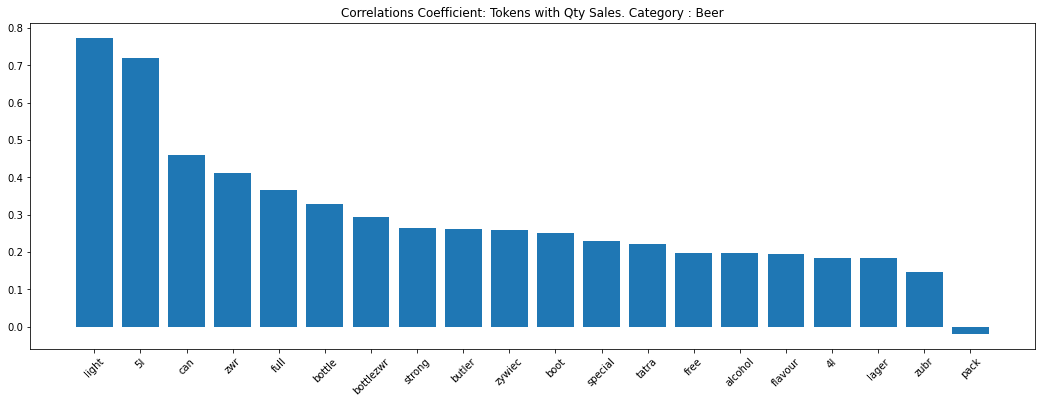

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(df_corr[:-1]['ILOSC'].sort_values(ascending=False).index,
        df_corr[:-1]['ILOSC'].sort_values(ascending=False).values)
ax.tick_params(axis='x', labelrotation = 45)
#ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.set_title("Correlations Coefficient: Tokens with Qty Sales. Category : Beer")
plt.show()